In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
    return 3*x**2 - 4*x +5

In [6]:
f(3.0)

20.0

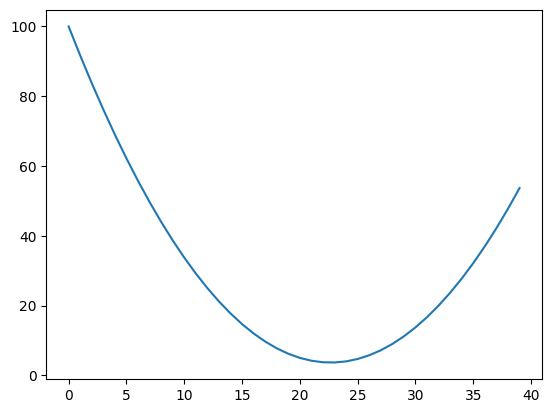

In [7]:
xs = np.arange(-5,5,.25)
ys = f(xs)
plt.plot(ys)

In [8]:
# slope
h = .0001
x = 3.0
(f(x+h) - f(x))/h

14.000300000063248

In [9]:
h = .0001
x = 2/3
(f(x+h) - f(x))/h

0.0002999999981767587

In [10]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [11]:
h = .0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print(f'd1 : {d1}')
print(f'd2 : {d2}')
print('slope : ',(d2-d1)/h)

d1 : 4.0
d2 : 3.999699999999999
slope :  -3.000000000010772


In [12]:
# DS
class Value:
    def __init__(self,data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data)
    
    def __mul__(self,other):
        return Value(self.data * other.data)

In [13]:
a = Value(2)
a

Value(data=2)

In [14]:
type(a)

__main__.Value

In [15]:
b = Value(-3)
b

Value(data=-3)

In [16]:
a + b

Value(data=-1)

In [17]:
a * b

Value(data=-6)

In [18]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a*b + c

Value(data=4.0)

In [19]:
# DS
class Value:
    def __init__(self,data,_children= ()):
        self.data = data
        self._prev = set(_children)
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other))
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other))

In [20]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [21]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [22]:
# DS
class Value:
    def __init__(self,data,_children= (),_op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')

In [23]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [24]:
d._op

'+'

In [25]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and the edges
    nodes , edges = set() , set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # LR= left to right
    
    nodes,edges= trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid,label = '{data %.4f}'%(n.data,),shape='record')
        if n._op:
            # if this value is result of some operation, create an op node for it
            dot.node(name= uid+n._op,label=n._op)
            # and connect this node to it 
            dot.edge(uid + n._op,uid)
            
    for n1,n2 in edges:
        # connect n1 to the op node of n2
        dot.egde(str(id(n1)),str(id(n1))+n2._op)
        
    return dot